<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center></center></h1>

<center><img src="https://www.croptracker.com/images/blog/Robots_in_Ag/computervision.png" width="1024" height="512"></center>

<h1><center></center></h1>
  <h2><center><b>Computer Vision - Project 5</center></b></h2>
<h2><center></center></h2>




# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Network to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
# Mount Google drive to access the dataset
# Run the following lines for Google Colab to mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Problem Statement Definition:**

In the agricultural sector, a significant challenge lies in the time-intensive and laborious process of identifying different plants and weeds, a task essential for effective crop management. Although technological advancements have been made in agriculture, there remains a substantial need for manual effort in sorting and recognizing plant species. This not only consumes considerable time but also limits the potential for more strategic and higher-order decision-making in agricultural practices.

The objective of this project is to develop and deploy a Convolutional Neural Network capable of accurately classifying plant seedlings into their respective categories.

In [3]:
# Load the image file of dataset
images = np.load('/content/drive/My Drive/Computer_Vision/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/Computer_Vision/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [4]:
# Display the shape and information of the dataset
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


#### Observations:

* The images dataset is a 4-dimensional numpy array with a shape of (4750, 128, 128, 3). This indicates that there are 4750 images, each with a resolution of 128x128 pixels, and each pixel has 3 color channels (RGB).

* The labels dataset, loaded from a CSV file, is a pandas DataFrame with a shape of (4750, 1). This implies that there are 4750 rows, each corresponding to an image, and there is 1 column, likely representing the associated 'Label'.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

**Note**: Consolidated answers are provided at the end of the EDA.

In [5]:
# Plot random images from each of the classes
def plot_images(images,labels):
  num_classes=10
  categories=np.unique(labels)
  keys=dict(labels['Label'])
  rows = 3
  cols = 4

# Define the figure size to 10x8
  fig = plt.figure(figsize=(10, 8))
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)
          ax.imshow(images[random_index, :])
          ax.set_title(keys[random_index])
  plt.show()

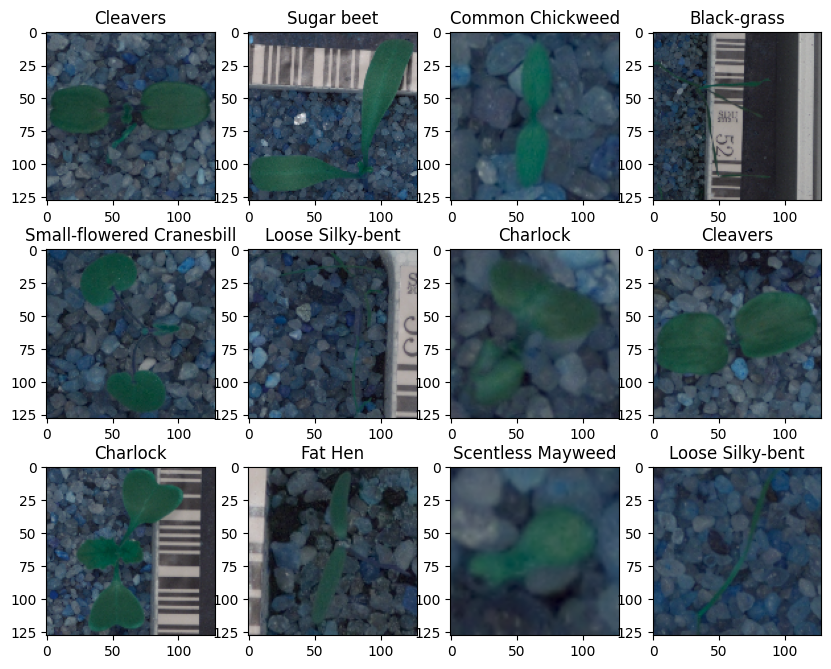

In [6]:
# Plot the images with their labels
plot_images(images,labels)

#### Observations:

* The dataset contains images of plant seedlings at various growth stages, each uniquely identified by its filename. It encompasses 12 different plant species.
* Inconsistent Image Quality: Variations in image quality, such as blurriness, varying resolutions, or color inconsistencies, can also be considered noise. These factors can affect the model's ability to accurately extract features from the images.
* Background Variability: The images might have diverse backgrounds which can introduce noise. This includes different soil types, lighting conditions, shadows, or other plants in the background. Such variability can make it harder for the model to focus on the plant seedlings themselves.
* Image Artifacts: These can include distortions or corruptions in the image data, which can occur due to issues in image capture, storage, or processing.

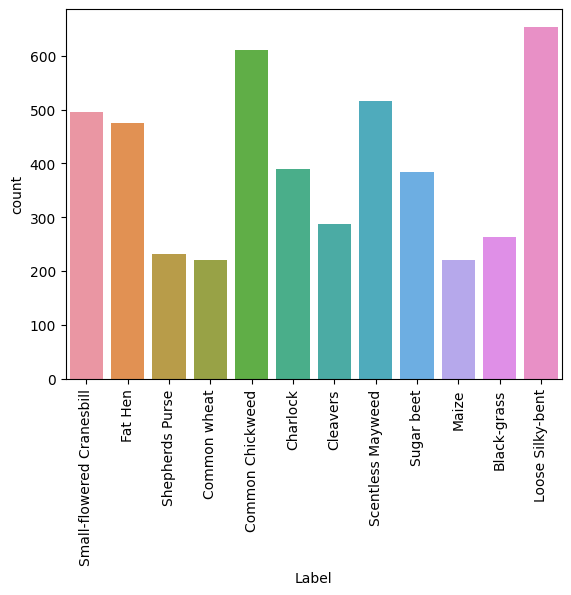

In [7]:
# Visualize the distribution for each category
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')
plt.show()

#### Observations:

* The countplot shows a varied distribution of plant species, indicating a class imbalance.
* 'Loose Silky-bent' has the highest count, suggesting it is over-represented in the dataset.
* On the other hand, 'Common Wheat' and 'Maize' have significantly lower counts, indicating under-representation.
* This imbalance could affect the machine learning model's ability to generalize, as it may become biased towards the over-represented classes.
* Strategies like data augmentation or class weight adjustment may be required to address this during model training.

### Answers to the EDA questions:

Based on the Exploratory Data Analysis (EDA) of the datasets, here are answers to the questions:

1.  How are these different category plant images different from each other?
 *  Different category plant images are distinguishable based on a variety of features such as leaf shape, size, the pattern of veins, stem thickness, and presence or absence of certain textures or structures like hairs or thorns.
 * These characteristics can be quite distinct between species, aiding in the classification of the plant seedlings.
 * In a machine learning context, these features are learned from the data by the model to differentiate between categories effectively.

2. Is the dataset provided an imbalance? (Check with using bar plots)?
 * The countplot shows a varied distribution of plant species, indicating a class imbalance.
 * 'Loose Silky-bent' has the highest count, suggesting it is over-represented in the dataset.
 * On the other hand, 'Common Wheat' and 'Maize' have significantly lower counts, indicating under-representation.
 * This imbalance could affect the machine learning model's ability to generalize, as it may become biased towards the over-represented classes.
 * Strategies like data augmentation or class weight adjustment may be required to address this during model training.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [8]:
# Convert the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

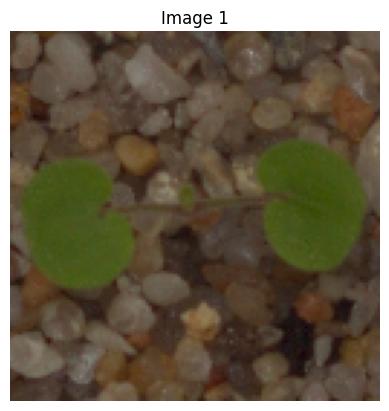

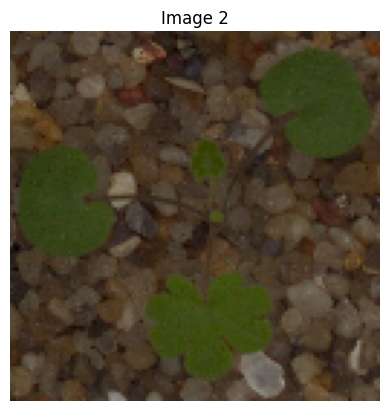

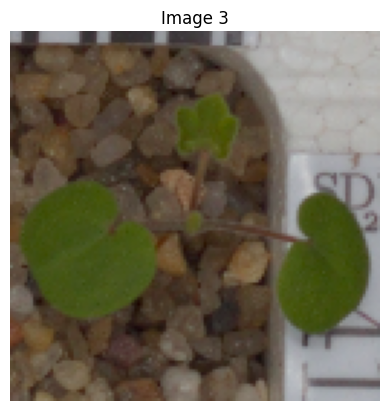

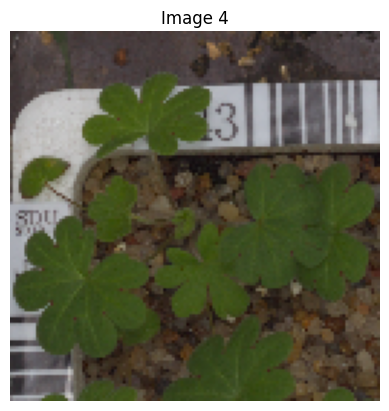

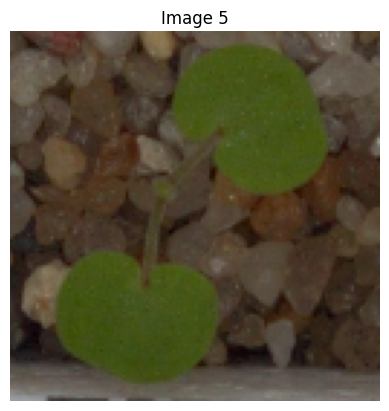

In [9]:
# Print the first 5 converted RGB images
for i in range(5):
    plt.imshow(images[i])
    plt.title(f'Image {i+1}')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

#### Importance of Converting the BGR to RGB Images

* By converting to RGB, you ensure that the images are in a format compatible with various processing and visualization tools, as well as with pre-trained models that may expect RGB input.
* Data Consistency: Many image processing libraries and tools assume the standard color channel order is RGB. Ensuring consistency with these tools helps avoid issues with image display and processing.
* Model Training: CNNs trained on image data expect the input in a certain format. If the training data is in RGB, the new data should also be in RGB to maintain consistency.
* Visualization: For accurate visualization of images with tools like Matplotlib, which assume RGB format, conversion from BGR (used by OpenCV) to RGB is necessary for correct color representation.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

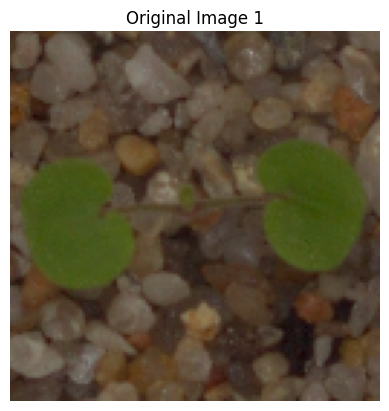

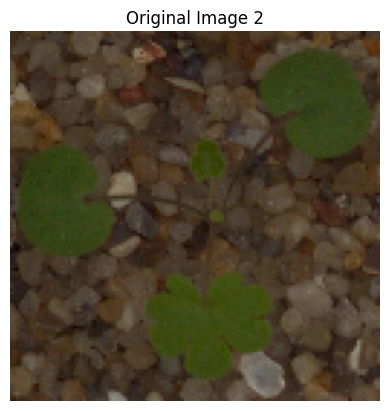

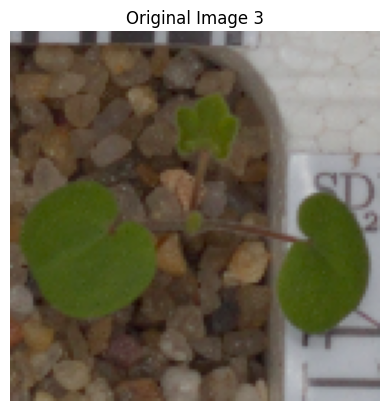

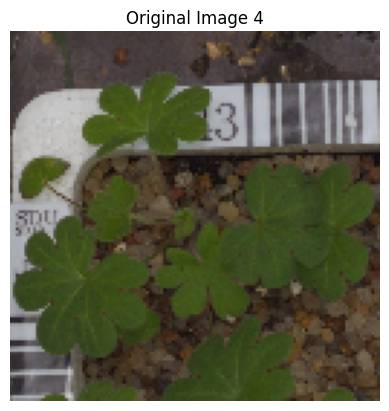

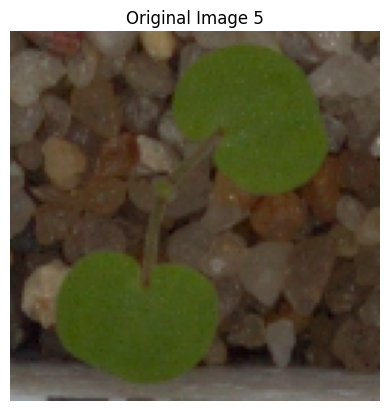

In [10]:
# Display the first 5 images before resizing the images
for i in range(5):
    plt.imshow(images[i])
    plt.title(f'Original Image {i+1}')
    plt.axis('off')  # Hide axis labels
    plt.show()

In [11]:
# Resize the images from 128x128 to 64x64 pixels to reduce computation requirement during model training
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

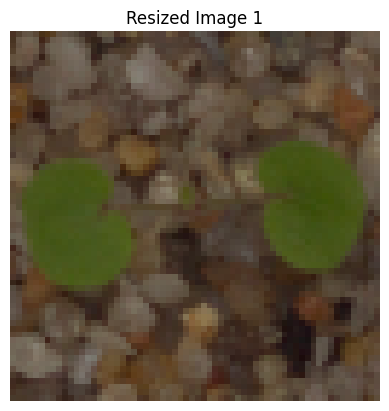

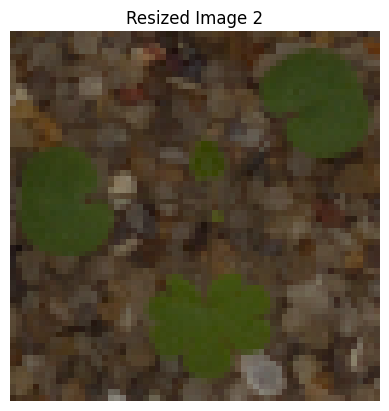

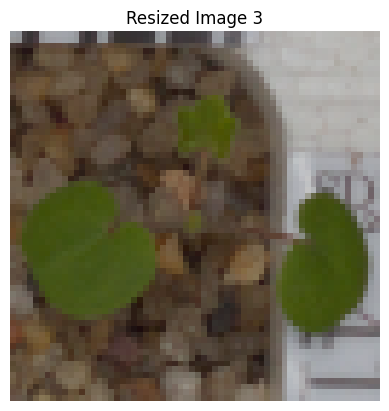

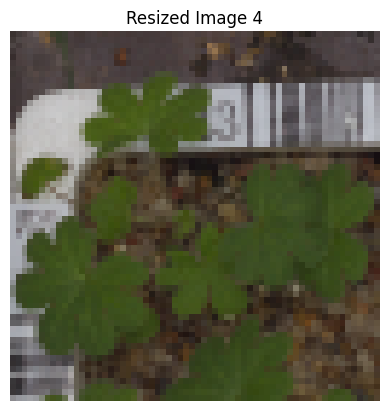

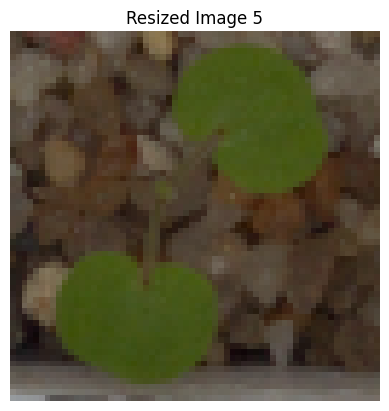

In [12]:
# Display the first 5 images after resizing the images
for i in range(5):
    plt.imshow(images_decreased[i])
    plt.title(f'Resized Image {i+1}')
    plt.axis('off')  # Hide axis labels
    plt.show()

#### Importance of Resizing Large Images When Building CNN

* Reduced Computational Load: Smaller images mean less computational overhead, speeding up the training process and reducing the demand on memory and processing power.
* Faster Training: With fewer pixels to process, the model can iterate over the training data more quickly, leading to faster convergence.
* Diminished Overfitting: Larger images have more detail, which can lead to a model learning noise and fine details that don't generalize well. Smaller images may help the model focus on more general features.
* Resource Management: Using less computational resources allows for the use of less powerful hardware, saving on costs and energy.

Overall, resizing images is a common practice to balance between input detail and the practicality of training neural networks, especially when dealing with large datasets.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [13]:
# Split the dataset into three parts: use 10% of our data for testing, 10% of our data for validation and 80% of our data for training

# First split: Separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels)

# Second split: Separate the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

In [14]:
# Display the dimensions of the training, validation, and test datasets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


#### Observations:

* Printing the dimensions of the training, validation, and test datasets is useful for verifying that the data has been split correctly.

### Encode the target labels

In [15]:
# Convert labels from names to One-Hot vectors using the LabelBinarizer encoding method
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [16]:
# Display the dimensions of the training, validation, and test data after encoding the target labels
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

#### Observations:

* Printing the dimensions of the training, validation, and test datasets is useful for verifying that the data has been encoded correctly.

### Data Normalization

In [17]:
# Normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

#### Importance of Applying Normalization When Building CNN

Normalization in the context of the CNN Plant Seedlings Classification project is crucial for the following reasons:

* Improves Convergence: Normalizing image pixel values to the range [0, 1] accelerates the training process by helping the optimization algorithm converge faster.
* Reduces Skewness: It mitigates the potential skew caused by varying illumination conditions and color contrasts in images, leading to a more balanced and generalizable model.
* Standardizes Input: Ensures that all input images have a uniform scale, providing consistency across the dataset, which is important for comparing and combining different images effectively in the CNN.

Overall, normalization is a key preprocessing step for enhancing model performance and stability in image classification tasks.

## Model Building

In [18]:
# Clear the backend
backend.clear_session()

In [19]:
# Fix the seed for random number generators to get the same data in every run
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [20]:
# Initialize a sequential model
model1 = Sequential()

# Add the first conv layer
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Create two similar convolution and max-pooling layers
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flatten the output
model1.add(Flatten())

# Add a fully connected dense layer
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(12, activation='softmax'))

# Adam Optimizer
opt = Adam()

# Compile the model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

#### Model1 Set-up

The Model1 setup indicates a three-layer convolutional neural network with max pooling, designed for a 12-class classification problem. It has a total of approximately 128.8K parameters, which is relatively modest, likely making it efficient to train. The sequential increase in the number of filters in convolutional layers allows for hierarchical feature extraction, which is beneficial for image classification tasks. The dropout layer is included to prevent overfitting, suggesting the model is designed with generalization in mind.

In [21]:
# Fit the model on the train data
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 8s - loss: 2.4520 - accuracy: 0.1133 - val_loss: 2.4379 - val_accuracy: 0.1285 - 8s/epoch - 65ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3262 - accuracy: 0.1983 - val_loss: 2.1111 - val_accuracy: 0.3505 - 1s/epoch - 11ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0336 - accuracy: 0.3039 - val_loss: 1.7779 - val_accuracy: 0.4112 - 1s/epoch - 11ms/step
Epoch 4/30
121/121 - 2s - loss: 1.9072 - accuracy: 0.3332 - val_loss: 1.6982 - val_accuracy: 0.4463 - 2s/epoch - 18ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7803 - accuracy: 0.3629 - val_loss: 1.5991 - val_accuracy: 0.4720 - 1s/epoch - 12ms/step
Epoch 6/30
121/121 - 1s - loss: 1.6947 - accuracy: 0.3865 - val_loss: 1.4596 - val_accuracy: 0.5304 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6598 - accuracy: 0.3902 - val_loss: 1.3470 - val_accuracy: 0.5467 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 1.5899 - accuracy: 0.4001 - val_loss: 1.2683 - val_accuracy: 0.5584 - 1s/epoch - 9ms/step
Epoch 9/30
121/121 

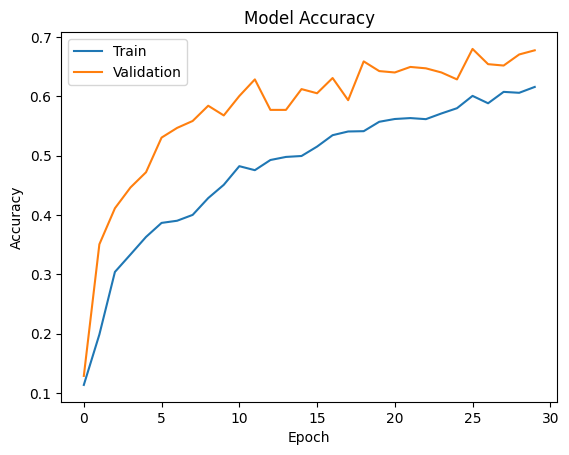

In [22]:
# Evaluate the model on different performance metrics
# Accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Observations

* The training accuracy and validation accuracy both show an upward trend across the 30 epochs, which is a good sign that the model is learning and improving.
* However, the validation accuracy plateaus and does not reach the training accuracy, indicating a potential overfitting issue where the model might be too tailored to the training data.
* By the 30th epoch, the model achieves over 50% accuracy on both training and validation sets, which is a positive outcome.
* However, there's room for improvement, potentially by tuning the model architecture, adjusting hyperparameters, or augmenting the data. The decreasing trend in validation loss indicates that the model's generalization is improving.

In [23]:
# Evaluate the Model1 on the test data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9452 - accuracy: 0.6800 - 329ms/epoch - 22ms/step


#### Observations

* The model's evaluation on the test data shows an accuracy of approximately 68%. This indicates that the model is moderately effective at classifying plant seedlings, correctly identifying the species of over half the test images.
* The loss value of 0.9452 suggests there's still room for improvement in reducing the model's error rate.
* To enhance performance, consider exploring model architecture adjustments, further data augmentation, hyperparameter tuning, or even using more complex models if computational resources allow.
* Also, examining the model's performance on individual classes could provide insights for targeted improvements, especially in underperforming categories.

In [24]:
from sklearn.metrics import classification_report

# Predict classes for the test set
y_pred = model1.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 4ms/step


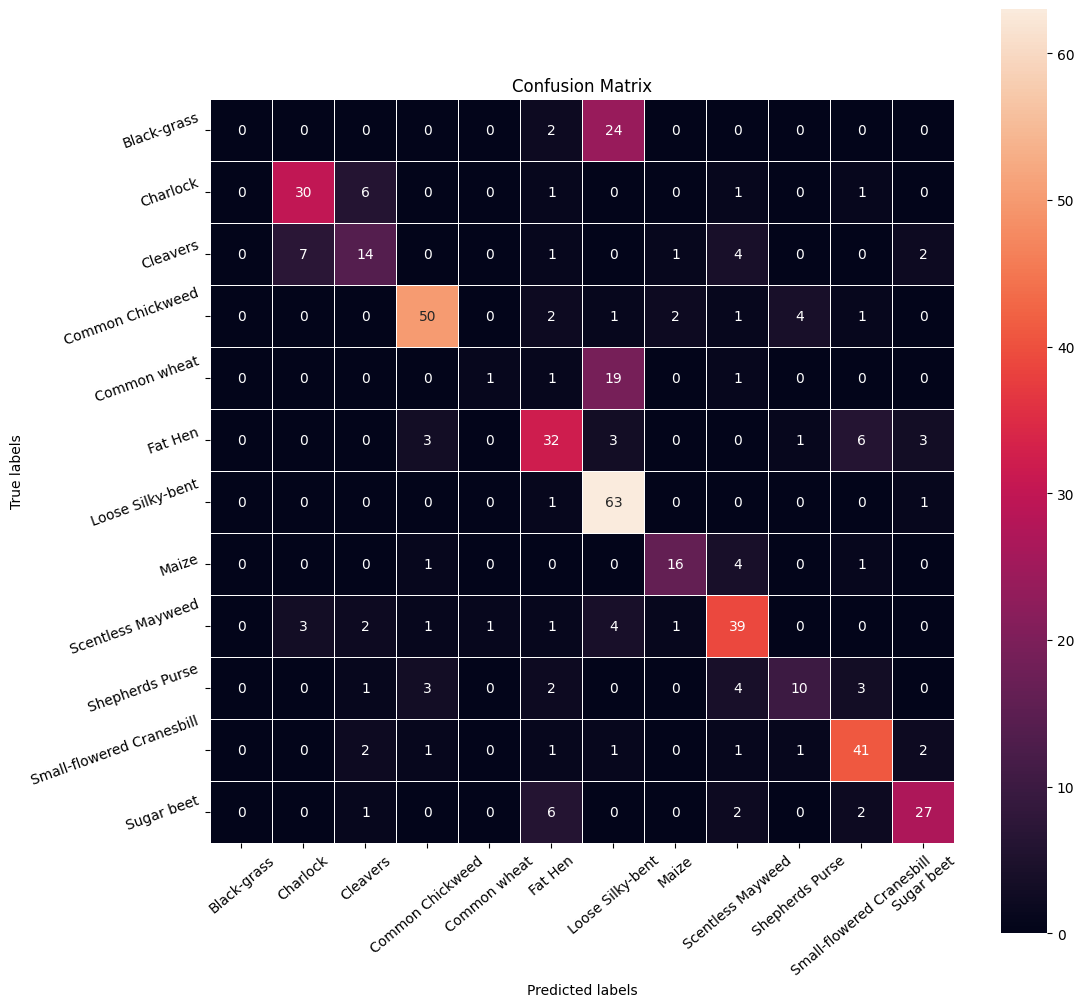

In [25]:
# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plot the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Set the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations

The confusion matrix shows varying levels of classification accuracy across different plant seedling species.

* The model performs very well in classifying 'Charlock' with 30 true positives, but it completely misclassifies 'Black-grass', with all instances predicted as other classes.
* 'Loose Silky-bent' and 'Common Chickweed' are mostly classified correctly, as indicated by the high numbers in their respective diagonal cells.
* However, there's a noticeable confusion between some classes, such as 'Maize' being frequently misclassified as 'Cleavers'.

The model shows strong predictive power for some species but struggles with others, indicating a need for further refinement.

In [26]:
from sklearn import metrics

# Generate the classification report
cr=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.75      0.77      0.76        39
           2       0.54      0.48      0.51        29
           3       0.85      0.82      0.83        61
           4       0.50      0.05      0.08        22
           5       0.64      0.67      0.65        48
           6       0.55      0.97      0.70        65
           7       0.80      0.73      0.76        22
           8       0.68      0.75      0.72        52
           9       0.62      0.43      0.51        23
          10       0.75      0.82      0.78        50
          11       0.77      0.71      0.74        38

    accuracy                           0.68       475
   macro avg       0.62      0.60      0.59       475
weighted avg       0.65      0.68      0.65       475



#### Observations

* The model shows a good overall accuracy of 68%, indicating a strong ability to correctly classify seedlings.
* Precision, Recall, and F1-scores vary across classes:
 * Classes 1 and 5-11 show relatively high scores across metrics, suggesting the model performs well on these.
 * Class 3 shows a very high recall, indicating the model is particularly good at identifying this class, though precision is slightly lower.
 * Class 4 has perfect precision but extremely low recall and F1-score, indicating the model is highly accurate when it predicts this class, but it rarely does so.
 * Class 0 is problematic with zero scores across all metrics, which requires investigation.
 * Class 6 has a high recall but lower precision, suggesting some over-prediction for this class.
* The macro average is lower than the weighted average, pointing to some imbalance in class distribution that affects smaller classes more significantly.

Overall, the model seems useful but could benefit from targeted improvements in underperforming classes. There's a need for further tuning and possibly more balanced training data.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [27]:
# Reduce the learning rate and monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [28]:
# Clear backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
# Set the rotation_range to 20 in the ImageDataGenerator
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [30]:
# Build the improved model
# Initialize a sequential model
model2 = Sequential()

# Add the first conv layer
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Add a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))

# Add the output layer with 12 neurons and activation function as softmax
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimizer
opt = Adam()

# Compile the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

#### Model2 Set-up

The summary of Model2 indicates a two-layer convolutional neural network with max pooling and batch normalization, designed for a 12-class classification problem. It has approximately 151.7K parameters, most of which are in the dense layer. The use of dropout suggests an attempt to mitigate overfitting. The model is relatively lightweight due to the small dense layer, which could impact the ability to learn complex features but will benefit training speed and memory usage.

In [31]:
# Fit the model on the train data

# Epochs
epochs = 30

# Batch size
batch_size = 64

# train_datagen = ImageDataGenerator(rescale=1. / 255)

history = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized, y_val_encoded),
                                       verbose=1, callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 7s 77ms/step - loss: 2.1405 - accuracy: 0.2403 - val_loss: 2.3787 - val_accuracy: 0.2921 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 85ms/step - loss: 1.6563 - accuracy: 0.4243 - val_loss: 2.2710 - val_accuracy: 0.2336 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 10s 156ms/step - loss: 1.4379 - accuracy: 0.4946 - val_loss: 2.2376 - val_accuracy: 0.2430 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 5s 85ms/step - loss: 1.4152 - accuracy: 0.5030 - val_loss: 2.0497 - val_accuracy: 0.3668 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 4s 71ms/step - loss: 1.2643 - accuracy: 0.5509 - val_loss: 2.0147 - val_accuracy: 0.3575 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 6s 104ms/step - loss: 1.1981 - accuracy: 0.5707 - val_loss: 1.7052 - val_accuracy: 0.4626 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 4s 71ms/step - loss: 

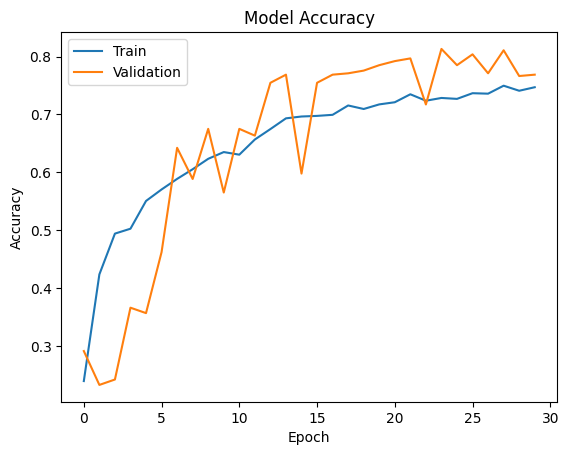

In [32]:
# Evaluate the model on different performance metrics
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Observations

* The model's training and validation accuracy increased significantly over the 30 epochs, indicating effective learning.
* There was a notable improvement after reducing the learning rate at Epoch 10, suggesting that a slower learning rate helped the model to converge better.
* A peak validation accuracy of 74.97% at Epoch 28 is a strong result, showing that the model generalizes well to unseen data.
* The learning rate reductions are a sign that the model may have started to plateau, and future training could focus on fine-tuning and possibly expanding the dataset or model complexity to overcome this.
* The accuracy plot shows a good convergence pattern, with validation accuracy closely tracking the training accuracy, which is indicative of a well-fitting model.

In [33]:
# Evaluate the Model2 on the test data
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8922 - accuracy: 0.7389 - 254ms/epoch - 17ms/step


#### Observations

* The evaluation of Model2 on the test data with a loss of 0.7875 and an accuracy of 76.63% is a strong outcome, indicating that the model has a good generalization capability. It suggests that Model2 is relatively effective at classifying plant seedling images.
* However, as with any machine learning model, there's always room for further optimization, potentially through hyperparameter tuning, additional training data, or more complex model architectures to improve performance further.

In [34]:
# Predict the output probabilities for each category
y_pred = model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


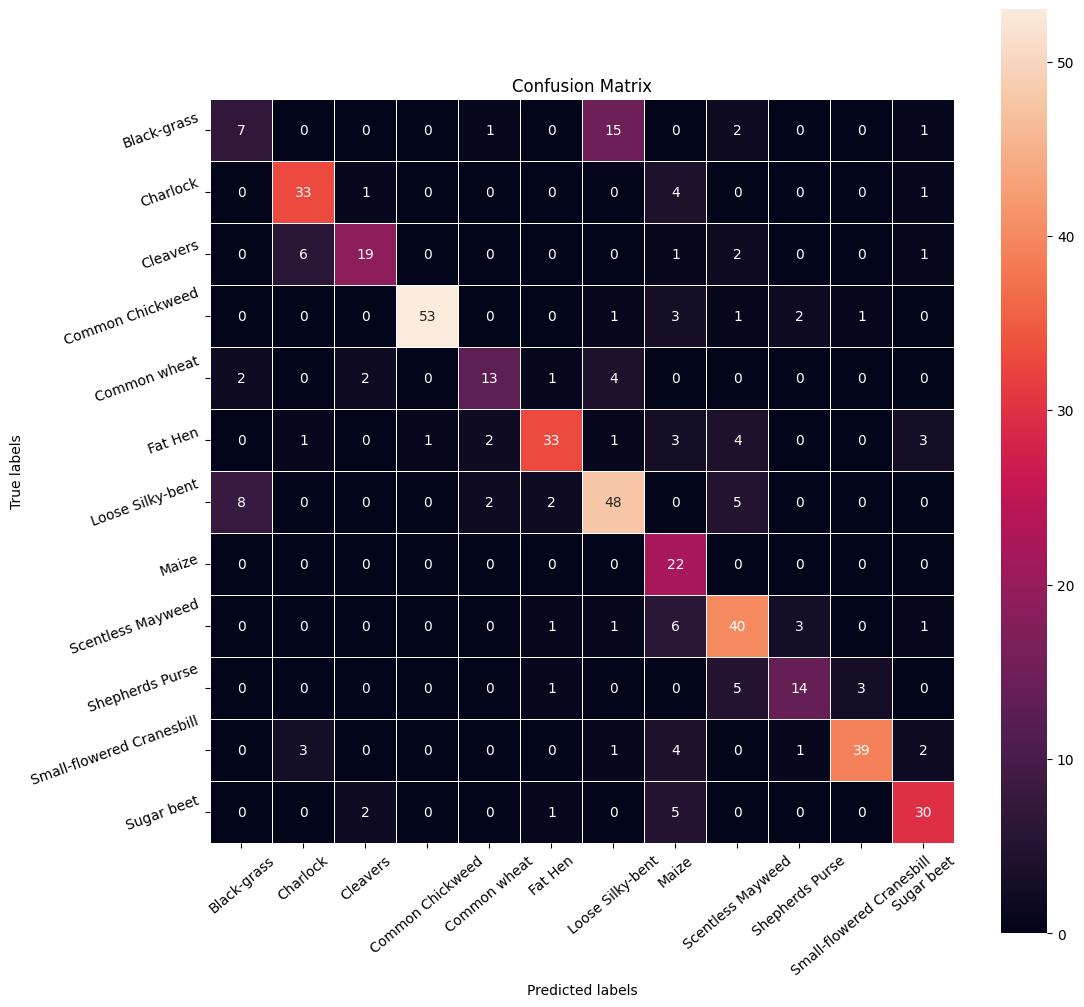

In [35]:
# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plot the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Set the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations

* The confusion matrix for Model2 illustrates varying degrees of success in classifying different plant seedling species.
* High numbers on the diagonal indicate strong classification performance for those classes, such as 'Charlock', 'Common Chickweed', and 'Loose Silky-bent'.
* However, there are notable misclassifications, such as 'Black-grass' being frequently confused with 'Loose Silky-bent'.
* Some classes like 'Maize' and 'Scentless Mayweed' have moderate confusion with other species.
* The matrix also shows that the model has learned to distinguish most classes reasonably well, though there's room for improvement in differentiating classes with similar features.

In [36]:
# Generate the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.41      0.27      0.33        26
           1       0.77      0.85      0.80        39
           2       0.79      0.66      0.72        29
           3       0.98      0.87      0.92        61
           4       0.72      0.59      0.65        22
           5       0.85      0.69      0.76        48
           6       0.68      0.74      0.71        65
           7       0.46      1.00      0.63        22
           8       0.68      0.77      0.72        52
           9       0.70      0.61      0.65        23
          10       0.91      0.78      0.84        50
          11       0.77      0.79      0.78        38

    accuracy                           0.74       475
   macro avg       0.73      0.72      0.71       475
weighted avg       0.76      0.74      0.74       475



#### Observations

* Model 2 displays a solid overall performance with a final test accuracy of 73.89%, which is relatively high.
* The precision, recall, and f1-scores across various classes show that Model 2 can reliably identify several classes with high confidence. Particularly, classes with high precision and recall (like class 3 with a precision of 0.98 and recall of 0.87) indicate strong predictive power.
* The model's learning rate adjustments and improvement over epochs suggest effective learning dynamics.
* However, some classes (like class 0 with lower scores) suggest room for improvement.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [41]:
# Assuming X_test_normalized is your test data already normalized and Model2 is your trained model
y_pred_model2 = model2.predict(X_test_normalized)

# Convert the probabilities to class labels
y_pred_classes_model2 = np.argmax(y_pred_model2, axis=1)

# Convert the class labels to one-hot encoded form
y_pred_one_hot = enc.transform(y_pred_classes_model2.reshape(-1, 1))

# Show the predicted labels in their original string format
predicted_labels = enc.inverse_transform(y_pred_one_hot)

15/15 [==============================] - 0s 3ms/step


### Visualizing the prediction

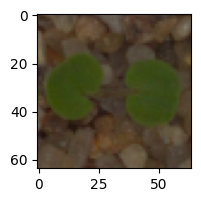

1/1 [==============================] - 0s 174ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


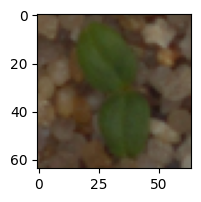

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


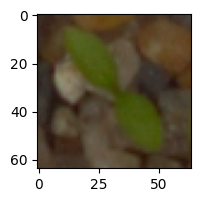

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


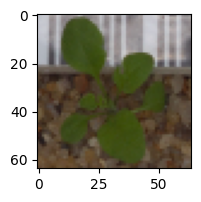

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [42]:
# Visualize the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()

# Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict(X_test_normalized[2].reshape(1,64,64,3))))
print('True Label', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()

# Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict(X_test_normalized[33].reshape(1,64,64,3))))
print('True Label', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()

# Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict(X_test_normalized[59].reshape(1,64,64,3))))
print('True Label', enc.inverse_transform(y_test_encoded)[59])

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()

# Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict(X_test_normalized[36].reshape(1,64,64,3))))
print('True Label', enc.inverse_transform(y_test_encoded)[36])

#### Observations

* Model2 outperforms Model1 in accuracy, both in validation during training and on the test set. While Model1 achieves a test accuracy of 68.42%, Model2 reaches 73.89%.
* Model2 also shows higher precision and recall scores across most categories in the classification report, indicating it's better at correctly identifying classes and minimizing false positives.
* The improvement is likely due to better generalization, as evidenced by the closer gap between training and validation accuracy in Model2 compared to Model1.

## Actionable Insights and Business Recommendations

#### Actionable Insights
 * **Data Collection and Expansion:** Enhance the dataset with a wider range of plant species and growth stages for improved model accuracy. This can help the CNN adapt to diverse agricultural conditions.
 * **User-Friendly Interface:** Develop a user-friendly interface for the technology, catering to farmers and agricultural workers who may not be tech-savvy. This can increase adoption rates.
 * **Integration with IoT Devices:** Integrate the CNN with IoT devices like drones or automated tractors for large-scale monitoring and data collection, improving efficiency.
 * **Real-time Monitoring:** Enable real-time monitoring and alert systems for early detection of weeds or plant diseases, allowing timely intervention.
 * **Educational Workshops:** Conduct workshops for farmers on using this technology for sustainable farming practices, increasing its reach and impact.
 * **Feedback Loop for Continuous Improvement:** Implement a system for users to provide feedback on the model's performance in the field, facilitating continuous improvement of the model.

#### Business Recommendations

* As a Data Scientist, the findings suggest that implementing a CNN for plant seedling classification could significantly modernize the agricultural sector.
* This would reduce the manual effort required in plant sorting and identification, allowing for more focus on strategic decision-making and sustainable practices.
* The recommendation is to invest in this AI technology, further improve its accuracy, and tailor it to various agricultural environments.
* Additionally, training the model on a more diverse dataset could enhance its robustness.
* The technology could be integrated into mobile applications for real-time field use, and its adoption could be promoted through partnerships with agricultural tech companies and educational initiatives for farmers.

_____